A Python run data analysis to predict chances ...

DATA DESCRIPTION
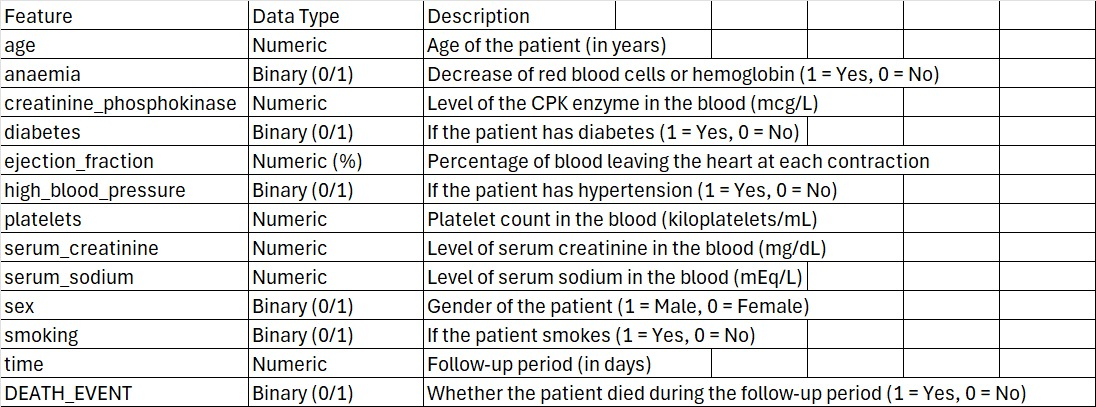

Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Optional: to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import colours
from matplotlib import cm

Loading the dataset and outputing the data

In [2]:
heartfailure = pd.read_csv("/kaggle/input/heartfailure-dataset-dhsa/Heart Failure Data.csv")
heartfailure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heartfailure.shape

(299, 13)

In [4]:
heartfailure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
heartfailure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
heartfailure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


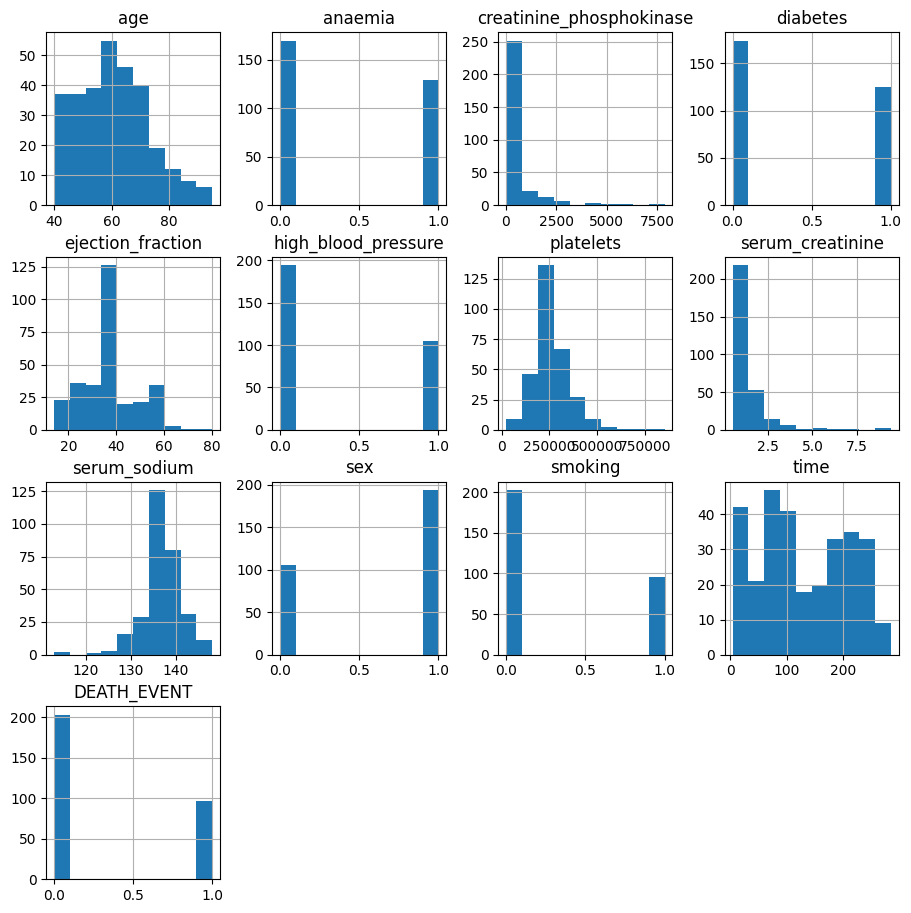

In [7]:
# statistics as graphs
heartfailure.hist(figsize = (11,11))
plt.show()

Studying the distribution of death events

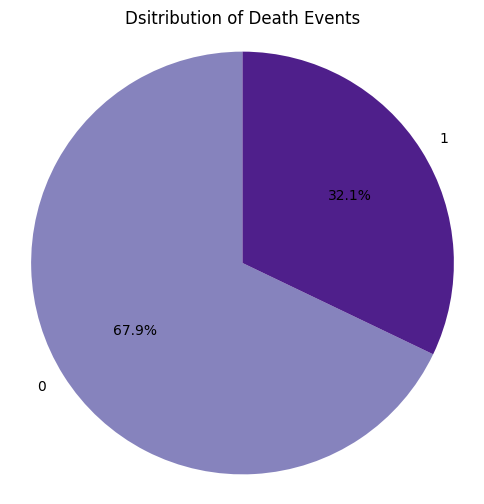

In [8]:
count_deathevents = heartfailure['DEATH_EVENT'].value_counts() 

colours = [cm.Purples(0.6), cm.Purples(0.9)]

plt.figure(figsize= (6,6))
plt.pie(count_deathevents, labels = count_deathevents.index,
       autopct = '%1.1f%%', startangle= 90, colors = colours)
plt.title("Dsitribution of Death Events")
plt.axis('equal')
plt.show()

Age distribution in a bar graph

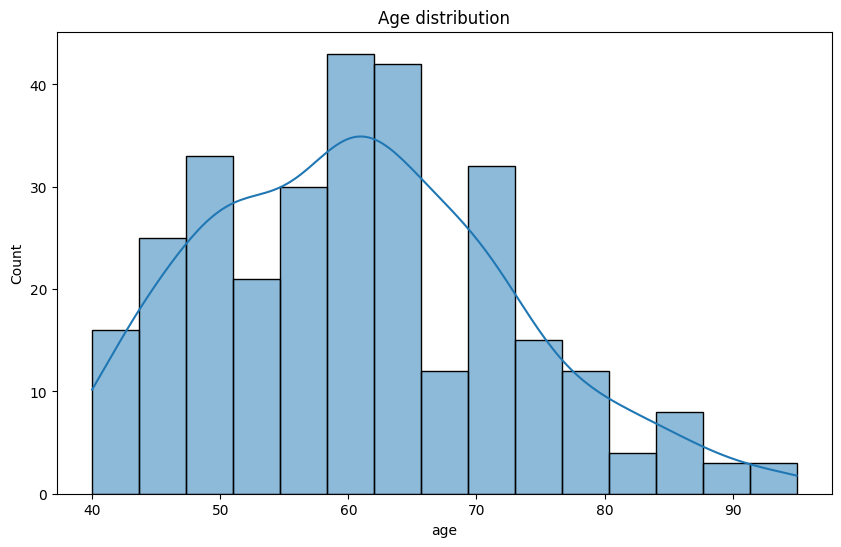

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data= heartfailure, x='age', kde= True, bins=15)
plt.title("Age distribution")
plt.show()

Correlation HeatMap

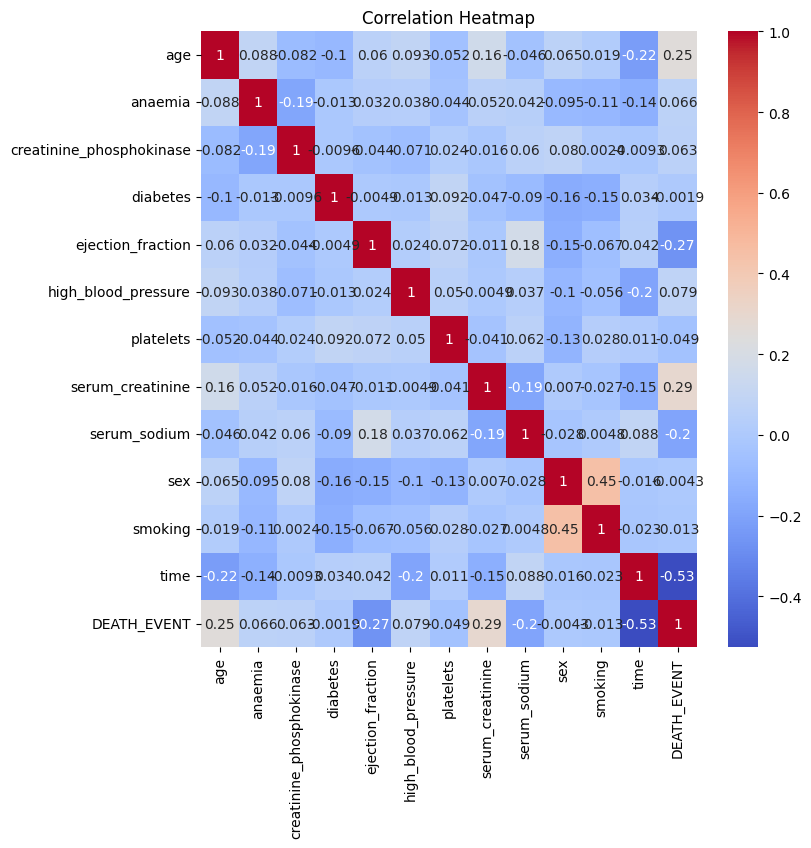

In [10]:
plt.figure(figsize=(8, 8))
corr_matrix = heartfailure.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # hue control with cmap
plt.title("Correlation Heatmap")
plt.show()

Feature selection for model development
Where X denotes the independent variables and y the dependent variable.


In [11]:
X = heartfailure.drop("DEATH_EVENT", axis=1)
y = heartfailure["DEATH_EVENT"]


In [12]:
#Normalising feature transformation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
#split into test and train data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state= 42
)

In [14]:
#Developing the model
#1- decision tree classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree - Classification Report")
print(classification_report(y_test, y_pred_dt))

Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        53
           1       0.63      0.51      0.57        37

    accuracy                           0.68        90
   macro avg       0.67      0.65      0.66        90
weighted avg       0.67      0.68      0.67        90



as a heatmap

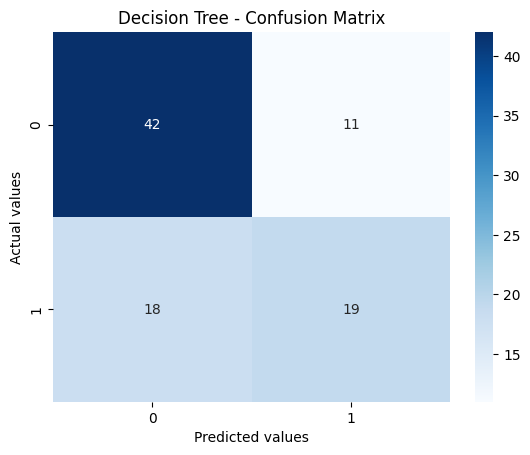

In [15]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot= True, fmt= "d", cmap = "Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.ylabel("Actual values")
plt.xlabel("Predicted values")
plt.show()

In [16]:
#k-nearest neighbours